<a href="https://colab.research.google.com/github/kartikspy/Winter_K_20BCS7357_Kartik/blob/main/Plant_leaf_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/download?datasetVersionNumber=2'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kartikkishore19
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:15<00:00, 187MB/s]


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [22]:
 len(os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [23]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [24]:
train= train_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size=(256,256), batch_size=32)

val= val_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [25]:
t_img, label = train.next()

In [26]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

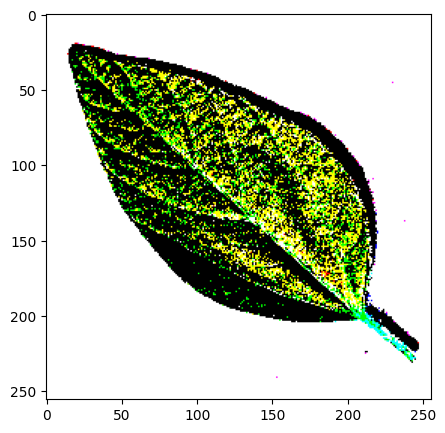

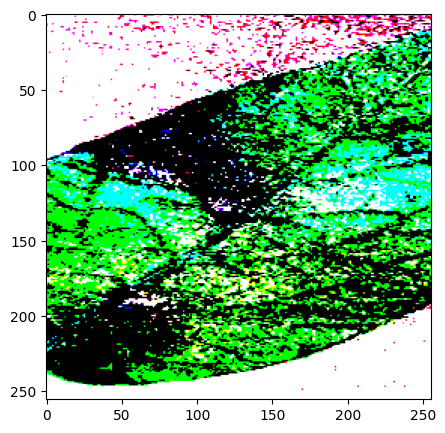

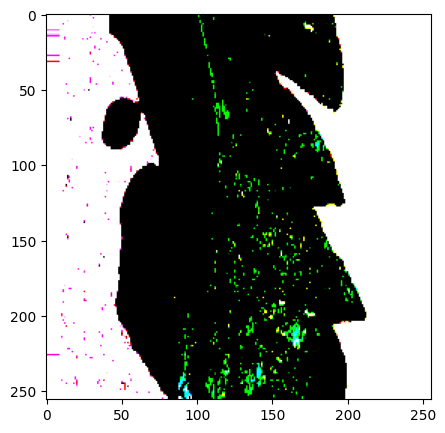

In [27]:
plotImage(t_img[:3],label[:3])

In [28]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras


In [29]:
base_model=VGG19(input_shape = (256,256,3), include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [30]:
for layer in base_model.layers:
  layer.trainable=False

In [31]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [34]:
X=Flatten()(base_model.output)

X=Dense(units=38, activation='softmax')(X)

#Creating Model
model=Model(base_model.input, X)


In [35]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Early Stopping and Model Checkpoints


In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es=EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, save_best_only=True)

cb=[es, mc]

In [ ]:
his=model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks=cb, validation_data=val, validation_steps=16)

<ipython-input-37-698fe48fd9e9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks=cb, validation_data=val, validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 27.0298 - accuracy: 0.1895 
Epoch 1: val_accuracy improved from -inf to 0.40430, saving model to best_model.h5
16/16 [==============================] - 1062s 68s/step - loss: 27.0298 - accuracy: 0.1895 - val_loss: 13.5051 - val_accuracy: 0.4043
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 13.7593 - accuracy: 0.4258 
Epoch 2: val_accuracy improved from 0.40430 to 0.58008, saving model to best_model.h5
16/16 [==============================] - 1089s 70s/step - loss: 13.7593 - accuracy: 0.4258 - val_loss: 9.2005 - val_accuracy: 0.5801
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 10.7667 - accuracy: 0.5527 
Epoch 3: val_accuracy improved from 0.58008 to 0.62891, saving model to best_model.h5
16/16 [==============================] - 1093s 70s/step - loss: 10.7667 - accuracy: 0.5527 - val_loss: 8.7170 - val_accuracy: 0.6289
Epoch 4/50
16/16 [==============================] - ETA: 